In [99]:
text = open('../../data/Vrp-Set-Li/Li/Li_32.vrp', 'r').read()
arr = text.split("\n")[:-1]
here = False
for a in arr:
    if a[:18] == "NODE_COORD_SECTION":
        here = True
        continue
    if here:
        parts = a.split(" ")
        print(parts[0], eval(parts[1])+1000, eval(parts[2])+1000)
    if a[:14] == "DEMAND_SECTION":
        break
    

1 1000.0 1000.0
2 1030.0 1000.0
3 1029.6307 1004.693
4 1028.5317 1009.2705
5 1026.7302 1013.6197
6 1024.2705 1017.6336
7 1021.2132 1021.2132
8 1017.6336 1024.2705
9 1013.6197 1026.7302
10 1009.2705 1028.5317
11 1004.693 1029.6307
12 1000.0 1030.0
13 995.307 1029.6307
14 990.7295 1028.5317
15 986.3803 1026.7302
16 982.3664 1024.2705
17 978.7868 1021.2132
18 975.7295 1017.6336
19 973.2698 1013.6197
20 971.4683 1009.2705
21 970.3693 1004.693
22 970.0 1000.0
23 970.3693 995.307
24 971.4683 990.7295
25 973.2698 986.3803
26 975.7295 982.3664
27 978.7868 978.7868
28 982.3664 975.7295
29 986.3803 973.2698
30 990.7295 971.4683
31 995.307 970.3693
32 1000.0 970.0
33 1004.693 970.3693
34 1009.2705 971.4683
35 1013.6197 973.2698
36 1017.6336 975.7295
37 1021.2132 978.7868
38 1024.2705 982.3664
39 1026.7302 986.3803
40 1028.5317 990.7295
41 1029.6307 995.307
42 1060.0 1000.0
43 1059.2613 1009.3861
44 1057.0634 1018.541
45 1053.4604 1027.2394
46 1048.541 1035.2671
47 1042.4264 1042.4264
48 1035.2671

IndexError: list index out of range

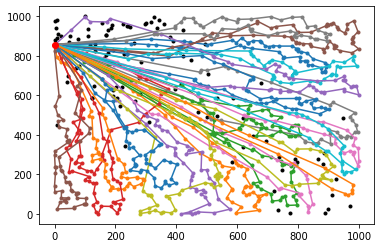

In [22]:
text = open('routes.txt', 'r').read()

arr = text.split("\n")[:-1]
routes = []
free_locations = None
depot = eval(arr[1])
arr = arr[2:]
for i in range(1,len(arr)):
    if i == 0:
        continue
    if arr[i] == "free locations:":
        free_locations = []
        continue
    
    if free_locations == None:
        routes += [eval(arr[i])]
    else:
        if arr[i]:
            free_locations = [x for x in eval(arr[i])]

routes = [[depot] + r + [depot] for r in routes]

import matplotlib.pyplot as plt

for i in range(len(routes)):
    if i < 100:
        plt.plot(*zip(*routes[i]), marker=".", zorder=1)
if free_locations:
    plt.scatter(*zip(*free_locations), color="black", marker=".", zorder=1)
plt.scatter(*zip(*[depot]), color="red", marker="o", zorder=2)
plt.show()

In [64]:
import math
# get fitness
def manhatten(route):
    dist = 0
    for i in range(len(route)-1):
        x1, y1 = route[i]
        x2, y2 = route[i+1]
        dist += abs(x1-x2) + abs(y1-y2)
    return dist

def eucl(route):
    dist = 0
    for i in range(len(route)-1):
        x1, y1 = route[i]
        x2, y2 = route[i+1]
        dist += math.sqrt((x1-x2)**2 + (y1-y2)**2)
    return dist

def drone_dist(fls, depot, drones, speed=2):
    dists = []
    for fl in fls:
        x,y = fl
        xd, yd = depot
        dists.append(2 * math.sqrt((x-xd)**2 + (y-yd)**2))

    dists.sort()

    ds = [0] * drones

    for d in dists[::-1]:
        sm = 0
        for i in range(drones):
            if ds[sm] > ds[i]:
                sm = i
        ds[sm] += d/speed
    return ds

    


makespan = 0
for route in routes:
    dist = eucl(route)
    print(dist)
    if dist > makespan:
        makespan = dist
ds = drone_dist(free_locations, depot, 25)

for dist in ds:
    print(dist)
    if dist > makespan:
        makespan = dist

makespan


1330.6529948750263
1540.1720844504002
1557.338477765655
1561.8512067241777
1561.0736691670295
874.0205947230305
806.3404987968793
798.5693457677925
734.4794074717139
675.4257916307313
660.3673220261584
626.3433563150487
582.6834475081646
520.3383514598938
429.8569529506298
402.16538886383546
366.67424234598207
363.94092927286977
356.2653505464712
346.666987179339
342.4280946417802
339.5173044190826
304.138126514911
443.6704342306683
443.0750092994809
431.6320301552992
437.9549619299913
439.84394301318247
468.61778113514805
488.6810251414304


1561.8512067241777

In [ ]:
for route in routes:
    print(route)
print(free_locations)

In [23]:
tot = 0
veh = 0
dr = 0
for route in routes:
    veh += len(route)-2
    tot += len(route)-2
    print(len(route))
tot += len(free_locations)
print("fls:", len(free_locations), "veh:", veh)
print("total:", tot)

54
49
35
41
49
54
28
36
45
46
47
47
55
40
49
57
29
51
35
27
54
15
fls: 101 veh: 899
total: 1000


In [4]:
sum([len(r) - 2 for r in routes]) + len(free_locations)

410

In [5]:
def plot_routes(file, save=None):
    text = open(file, 'r').read()
    arr = text.split("\n")[:-1]
    routes = []
    free_locations = None
    depot = eval(arr[1])
    arr = arr[2:]
    for i in range(1,len(arr)):
        if i == 0:
            continue
        if arr[i] == "free locations:":
            free_locations = []
            continue
        
        if free_locations == None:
            routes += [eval(arr[i])]
        else:
            if arr[i]:
                free_locations = [x for x in eval(arr[i])]
    routes = [[depot] + r + [depot] for r in routes]
    for i in range(len(routes)):
        plt.plot(*zip(*routes[i]), marker="o", zorder=1)
    if free_locations:
        plt.scatter(*zip(*free_locations), color="black", marker="o", zorder=1)
    plt.scatter(*zip(*[depot]), color="red", marker="o", zorder=2)
    if save != None:
        plt.savefig(save)
    plt.show()
    

In [6]:
def plot_all_routes(dir, save_dir=None):
    i = 0
    while open(f"{dir}routes{i}.txt", 'r'):
        print(f"Generation: {i}")
        if save_dir == None:
            plot_routes(f"{dir}routes{i}.txt")
        else:
            plot_routes(f"{dir}routes{i}.txt", f"{save_dir}routes{i}.png")
        i += 1000



Generation: 0


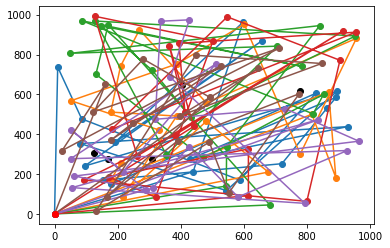

Generation: 1000


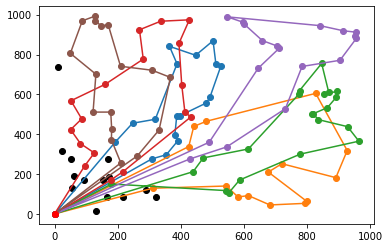

Generation: 2000


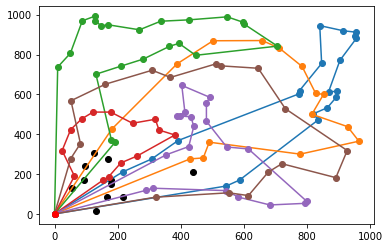

Generation: 3000


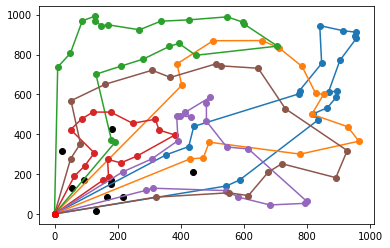

Generation: 4000


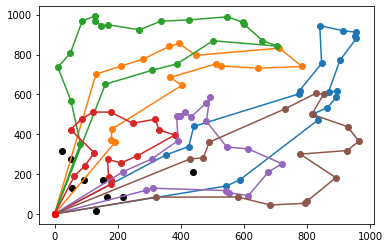

FileNotFoundError: [Errno 2] No such file or directory: 'animation/routes5000.txt'

In [7]:
plot_all_routes("animation/", "animation/img/")

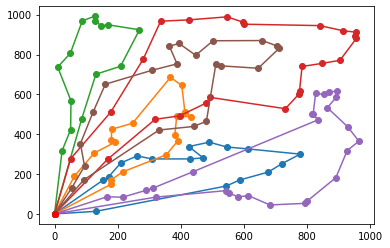

In [ ]:
plot_routes("routes.txt")